In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('data2.csv')
data.head()
Y=data['h_score']
X=data[data.columns.difference(['h_score'])]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [105]:
class linear_model():
    def __init__(self,p=2,poly=1):
        self._phi=None
        self._p=p
        self.poly=poly
        self._weights=None
        self._y=None
        self._lr=0.000001
        self._lmda=1000
        self._iter=300
        self._rmse=1000;
        
    def scale_features(self,mat):
        normed= (mat-mat.mean(axis=0))/mat.std(axis=0)
        #normed=np.hstack((normed,np.ones(mat.shape[0]).reshape((mat.shape[0],1))))
        return normed
    
    def transform_features(self,mat):
        retval=mat
        rx=mat
        for fi in range(mat.shape[1]):
            for k in range(fi+1,mat.shape[1]):
                rx=np.hstack((rx,mat[:,fi].reshape((mat.shape[0],1))*mat[:,k].reshape((mat.shape[0],1))))
        for fi in range(mat.shape[1]):
            for i in range(self.poly-1):
                retval=np.hstack((retval,mat[:,fi].reshape((mat.shape[0],1))**(i+2)))
        retval=self.scale_features(retval)
        rx=self.scale_features(rx)
        #retval=np.hstack((retval,rx))
        retval=np.hstack((retval,np.ones(mat.shape[0]).reshape((mat.shape[0],1))))
        
        return retval
    
    def fit(self,x,y):
        self._phi=x.as_matrix()
        self._y=y.as_matrix().reshape((y.size,1))
        self._phi=self.transform_features(self._phi)
        self._weights=np.zeros(self._phi.shape[1]).reshape((self._phi.shape[1],1))
        errs=[]
        for i in range(self._iter):
            step=self.gd_step()
            self._weights=step
            self._rmse=self.rmse(self._phi,self._y)
            errs.append(self.rmse(self._phi,self._y))
        plt.plot(range(self._iter),errs)
        plt.show()
        print ('<< DONE TRAINING >>')
    
    def power(self,x):
        if x==0:
            return 1
        else:
            return x**(self._p-2)
        
    def mod_w_p(self):
        x=np.absolute(self._weights)
        vfunc = np.vectorize(self.power)
        x=vfunc(x)
        return x
    
    def gd_step(self):
        t1=np.dot(self._phi.T,self._y)
        t2=np.dot(np.dot(self._phi.T,self._phi),self._weights)
        t3=self._lmda*self._p*np.dot(self._weights.T,self.mod_w_p())
        t=t1-t2-t3
        return self._weights+t*self._lr
    
    
    def predict(self,x):
        return np.matmul(x,self._weights)
    
    def rmse(self,x,y):
        err=0.0
        err=((y-self.predict(x))**2).sum()/y.size
        err=err**.5
        return err

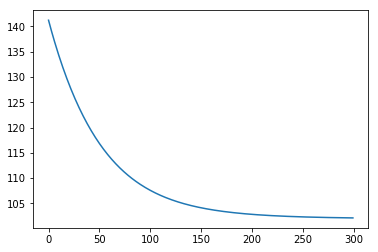

<< DONE TRAINING >>
102.135518067
[[ -6.40039700e+00]
 [ -2.20800545e+00]
 [  2.81351221e+00]
 [ -2.37874810e+00]
 [  1.15406416e+00]
 [ -4.27114705e-01]
 [ -1.66964953e+00]
 [ -1.28436335e+01]
 [ -9.52907859e-01]
 [ -4.51030398e+00]
 [ -2.49464202e+00]
 [ -5.51629309e+00]
 [  1.36309319e-01]
 [  2.51663240e-01]
 [  8.29163562e-01]
 [ -9.46256508e-01]
 [ -4.27137754e-02]
 [  3.16402223e+00]
 [ -1.26131900e+00]
 [ -6.80938724e-01]
 [ -2.14480526e+00]
 [ -1.06055537e+00]
 [ -1.75758526e+00]
 [ -4.63996810e+00]
 [ -1.21836041e+00]
 [ -5.59588463e+00]
 [ -1.47554141e+01]
 [  1.15215834e+01]
 [  8.78353652e+01]]


In [106]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

import datetime

def date2t(x):
    l=x.split(':')
    return float(l[-3].split(' ')[-1])+float(l[-2])/60.

def date2m(x):
    l=x.split(" ")
    return int((float(l[0].split('-')[1])+float(l[0].split('-')[2])/30)*2)

def date2d(x):
    l=x.split(" ")
    s=(l[0].split('-'))
    return datetime.date(int(s[0]),int(s[1]),int(s[2])).weekday()

train['time']=train['date'].apply(date2t)
train['month']=train['date'].apply(date2m)
train['day']=train['date'].apply(date2d)
test['time']=test['date'].apply(date2t)
test['month']=test['date'].apply(date2m)
#train=train[train['Output']<500]
X=train[train.columns.difference(['Output'])]
Y=train[['Output']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# train['time']=train['date'].apply(date2t)
# test['time']=train['date'].apply(date2t)
# train['month']=train['date'].apply(date2m)

# features_taken=['time','T6','Windspeed','Visibility']
features_taken=X_train.columns.difference(['date'])
X_train=X_train[features_taken]



Y_train=Y_train[['Output']]
X_test=X_test[features_taken]

l=linear_model(p=2,poly=1)
l.fit(X_train,Y_train)

print(l._rmse)
print(l._weights)
X_test=l.transform_features(X_test.as_matrix())



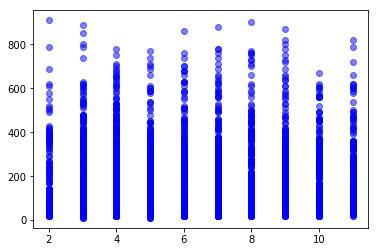

In [305]:

#print(l.rmse(X_test,Y_test))

plt.scatter(train['month'],Y,color='blue',alpha='.5')
plt.show()


In [110]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=1000)
reg.fit(X_train,Y_train)
print(reg.coef_)
print(reg.intercept_)

# print(l._weights)
# print(l.rmse(l.transform_features(X_train),Y_train))
from sklearn.metrics import mean_squared_error

X_train=l.scale_features(X_train)
print(mean_squared_error(Y_train,np.dot(X_train,reg.coef_) + reg.intercept_)**(.5))
# print(mean_squared_error(Y_train,l._weights[0]*X_train_t + l._weights[1])**.5)
# plt.plot(X_train,reg.coef_*X_train + reg.intercept_,color='blue')
# plt.plot(X_train,l._weights[0]*X_train_t + l._weights[1],color='red')
# plt.scatter(X_train,Y_train)
# plt.show()

[[ -0.14969775   0.15071422   3.29130268  -1.29911112   2.03026128
   -0.27797275   0.26642747  -2.35282938  -0.29094634  -3.52900751
   -0.99084599  -1.58117671   0.82357768   0.57958109   1.38125721
    0.50844293   1.19790425   6.50455283   0.39799431   0.73555285
   -0.77557575  -0.23440973  -2.66146387  -0.30851133   3.32212405
    0.44596515  -5.18844834  18.11659249]]
[ 98.28173077]


ValueError: shapes (10400,28) and (1,28) not aligned: 28 (dim 1) != 1 (dim 0)

[[  1.18503809e+01]
 [ -2.45535169e-01]
 [  1.42882420e-01]
 [ -8.94027149e-01]
 [  3.74314577e+00]
 [ -3.31073329e+00]
 [ -8.87870034e+00]
 [ -1.32791944e+01]
 [  1.60725762e-02]
 [  4.75879182e-01]
 [  3.79550386e-01]
 [ -5.69444662e-02]
 [ -3.16245626e-01]
 [ -8.25451016e-01]
 [ -7.20595064e-01]
 [ -3.42244622e-01]
 [ -7.79883320e-01]
 [ -5.86817964e-01]
 [ -4.23845641e-01]
 [ -3.03692350e-01]
 [  8.57337531e+01]
 [  1.18503809e+01]
 [ -2.45535169e-01]
 [  1.42882420e-01]
 [ -8.94027149e-01]
 [  2.66638222e+00]
 [  5.96017262e+00]
 [  7.77583318e+00]
 [  1.50983472e-01]
 [ -1.71466781e-01]
 [ -4.07966156e-01]]


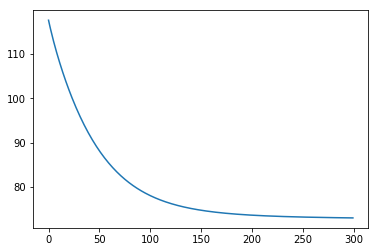

<< DONE TRAINING >>


In [27]:

print (l._weights)
features=['time','T6','Windspeed','Visibility']
X=train[features]
Y=train['Output']

l2=linear_model(p=1.1,poly=5)
l2.fit(X,Y)

X_test=l2.transform_features(test[features].as_matrix())

result=pd.DataFrame(test['Id'])
result['Output']=pd.Series(l2.predict(X_test).flatten())
result.to_csv('submissionx.csv',index=False)